# **1. Importing Required Libraries**
We import libraries for data manipulation, visualization, image processing, machine learning, and model building.

In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [27]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# **2. Mounting Google Drive**
Mounting Google Drive to access the dataset stored in `SmilingFaceModel`.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
folder_path = '/content/drive/MyDrive/SmilingFaceModel'

In [5]:
smile_dir = os.path.join(folder_path, 'smile')
non_smile_dir = os.path.join(folder_path, 'non_smile')

In [6]:
print("Smile images:", len(os.listdir(smile_dir)))
print("Non-smile images:", len(os.listdir(non_smile_dir)))

Smile images: 600
Non-smile images: 603


# **3. Checking Dataset Structure**
Displaying the number of smile and non-smile images to verify the dataset integrity.

In [7]:
def show_random_images(folder_path, title, num_images=5):
    image_files = os.listdir(folder_path)
    selected_files = random.sample(image_files, num_images)

    plt.figure(figsize=(15, 5))
    for i, file in enumerate(selected_files):
        img_path = os.path.join(folder_path, file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
    plt.show()

## **3.1 Displaying Random Smile Images**
Showing a few random smile images to get a sense of the data.

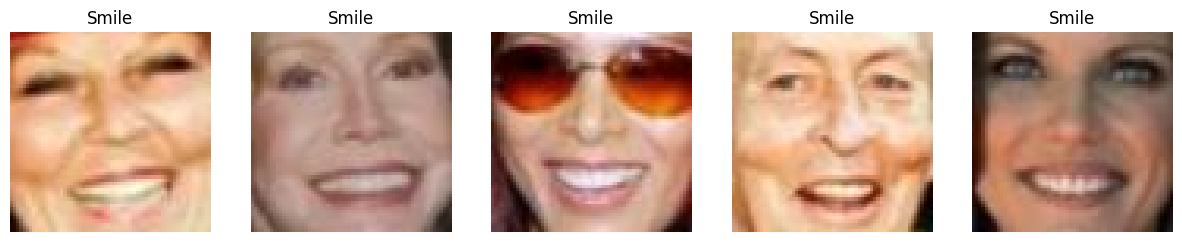

In [8]:
show_random_images(smile_dir, title="Smile")

## **3.2 Displaying Random Non-Smile Images**
Showing a few random non-smile images to get a sense of the data.

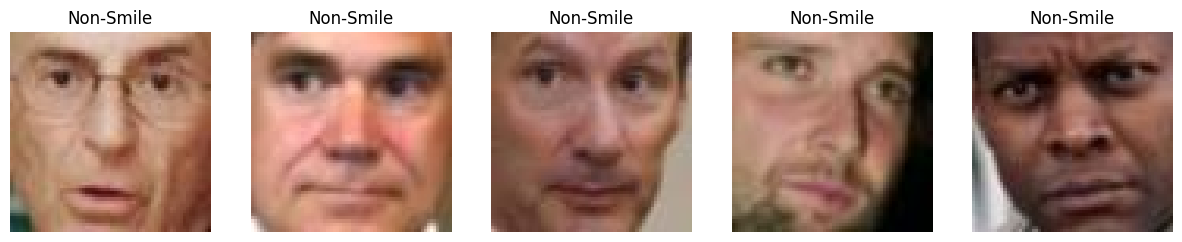

In [9]:
show_random_images(non_smile_dir, title="Non-Smile")

# **4. Loading and Preprocessing Images**
Loading images from the dataset, resizing them to 64x64, normalizing pixel values, and assigning labels (`1` for smile, `0` for non-smile).

In [10]:
def load_images_from_folder(folder, label, img_size=(64, 64)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, img_size)
            img = img / 255.0  # Normalize
            images.append(img)
            labels.append(label)
    return images, labels

In [11]:
smile_images, smile_labels = load_images_from_folder(smile_dir, label=1)
non_smile_images, non_smile_labels = load_images_from_folder(non_smile_dir, label=0)

# **5. Creating Dataset Arrays**
Combining smile and non-smile images into feature and label arrays (`X` and `y`).

In [12]:
X = np.array(smile_images + non_smile_images)
y = np.array(smile_labels + non_smile_labels)

In [13]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1203, 64, 64, 3)
Shape of y: (1203,)


# **6.Splitting Dataset**
Splitting the dataset into training and validation sets (80% train, 20% validation) while maintaining class balance.

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training samples:", X_train.shape[0])
print("Validation samples:", X_val.shape[0])

Training samples: 962
Validation samples: 241


# **7.Building the CNN Model**
Defining a Convolutional Neural Network using Keras Sequential API for binary classification.

In [15]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,281 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_val, y_val))

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - accuracy: 0.5152 - loss: 0.7202 - val_accuracy: 0.8921 - val_loss: 0.6076
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7403 - loss: 0.5803 - val_accuracy: 0.8465 - val_loss: 0.3922
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8769 - loss: 0.3520 - val_accuracy: 0.9336 - val_loss: 0.2035
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8986 - loss: 0.2750 - val_accuracy: 0.9627 - val_loss: 0.1880
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9322 - loss: 0.2010 - val_accuracy: 0.9585 - val_loss: 0.1488
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9191 - loss: 0.1925 - val_accuracy: 0.9461 - val_loss: 0.1271
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9539 - loss: 0.1564 - val_accuracy: 0.9295 - val_loss: 0.1537
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9503 - loss: 0.1580 - val_accuracy: 0.9793 - va

# **8. Model Evaluation**
*   Plotting training and validation accuracy over epochs using Seaborn.

*   Plotting training and validation loss over epochs using Seaborn.


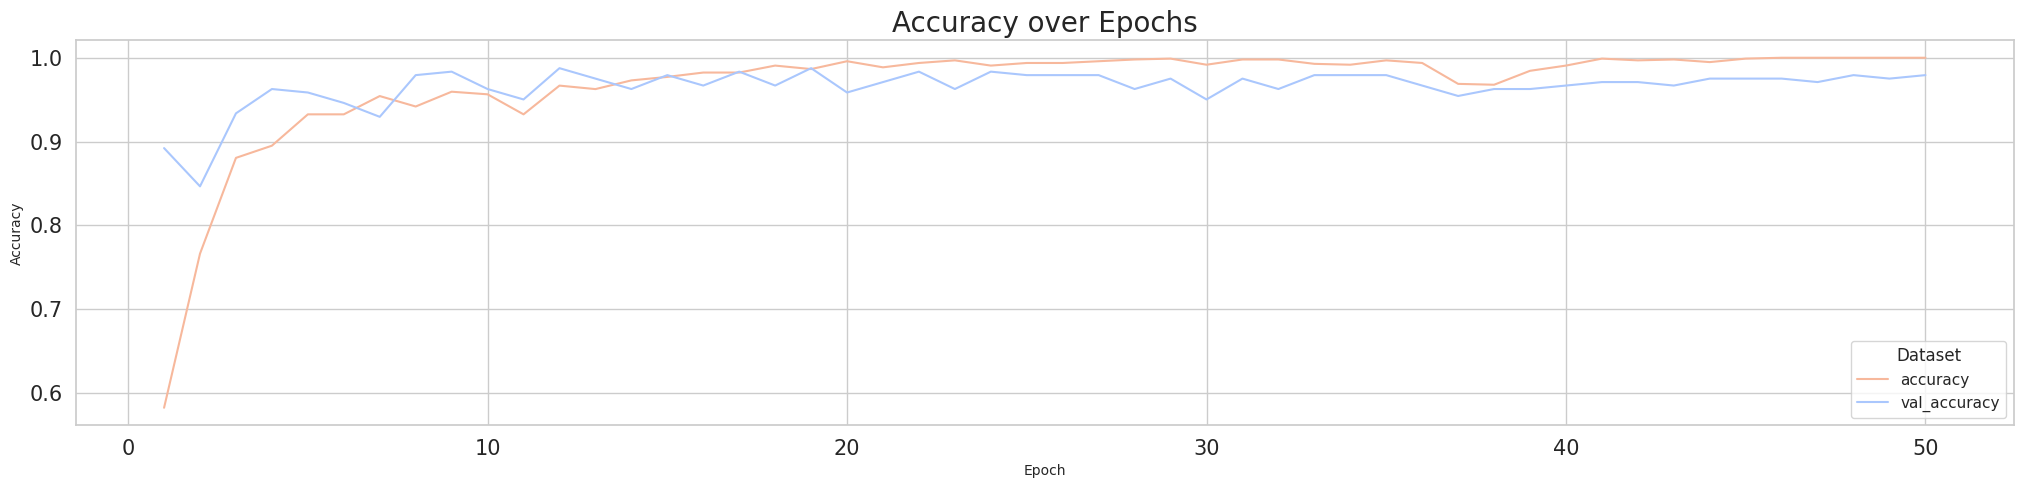

In [17]:
sns.set(style="whitegrid")

history_df = pd.DataFrame(history.history)
history_df['epoch'] = history_df.index + 1

history_long = history_df.melt(id_vars='epoch', value_vars=['accuracy', 'val_accuracy'],
                                var_name='Type', value_name='Accuracy')

plt.figure(figsize=(25, 5))
sns.lineplot(x='epoch', y='Accuracy', hue='Type', data=history_long, palette="coolwarm_r")

plt.tick_params(labelsize=15)
plt.title("Accuracy over Epochs", fontsize=20)
plt.xlabel("Epoch", fontsize=10)
plt.ylabel("Accuracy", fontsize=10)
plt.legend(title='Dataset')

plt.show()

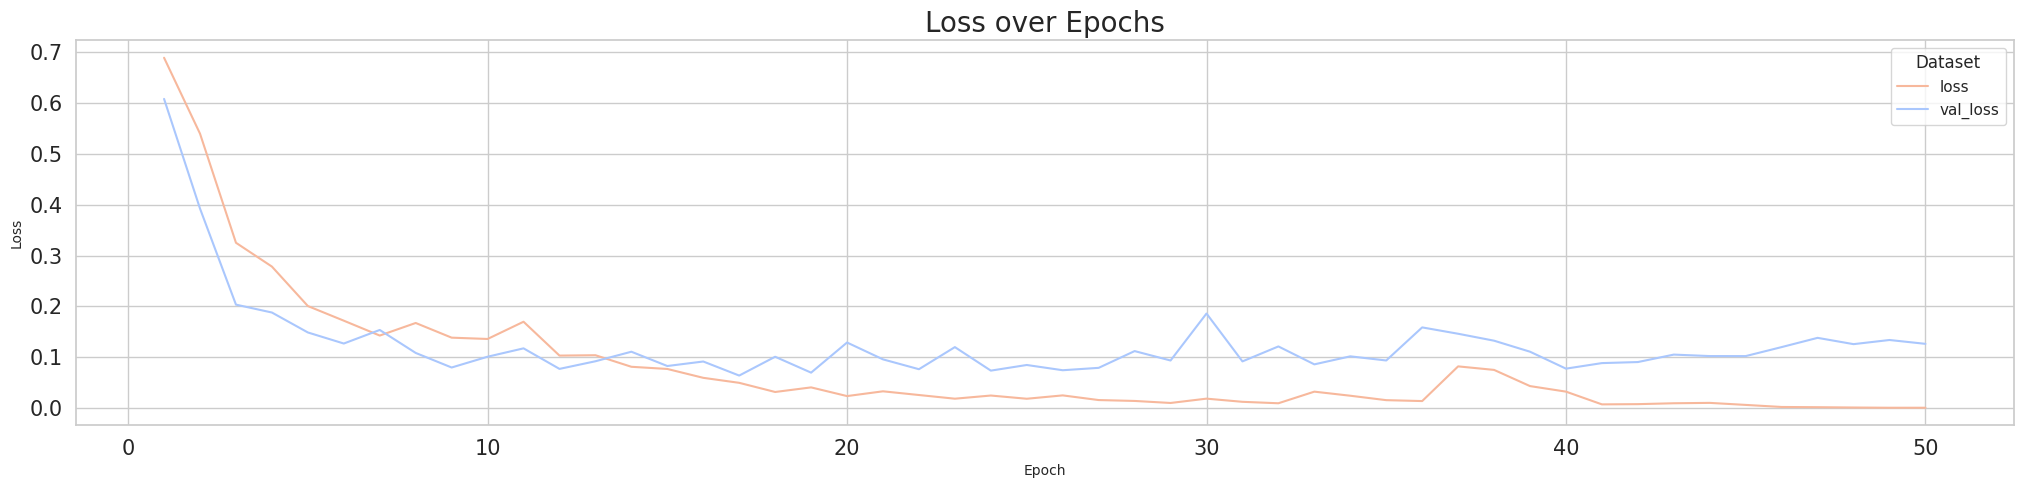

In [18]:
# Set seaborn style
sns.set(style="whitegrid")

history_df = pd.DataFrame(history.history)
history_df['epoch'] = history_df.index + 1

loss_long = history_df.melt(id_vars='epoch', value_vars=['loss', 'val_loss'],
                            var_name='Type', value_name='Loss')

plt.figure(figsize=(25, 5))
sns.lineplot(x='epoch', y='Loss', hue='Type', data=loss_long, palette="coolwarm_r")

plt.tick_params(labelsize=15)
plt.title("Loss over Epochs", fontsize=20)
plt.xlabel("Epoch", fontsize=10)
plt.ylabel("Loss", fontsize=10)
plt.legend(title='Dataset')

plt.show()


In [19]:
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Accuracy: {val_acc:.2f}")

Validation Accuracy: 0.98


In [23]:
# Print final epoch metrics
final_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"Final Training Accuracy: {final_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")
print(f"Final Training Loss: {final_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")

Final Training Accuracy: 1.0000
Final Validation Accuracy: 0.9793
Final Training Loss: 0.0009
Final Validation Loss: 0.1265


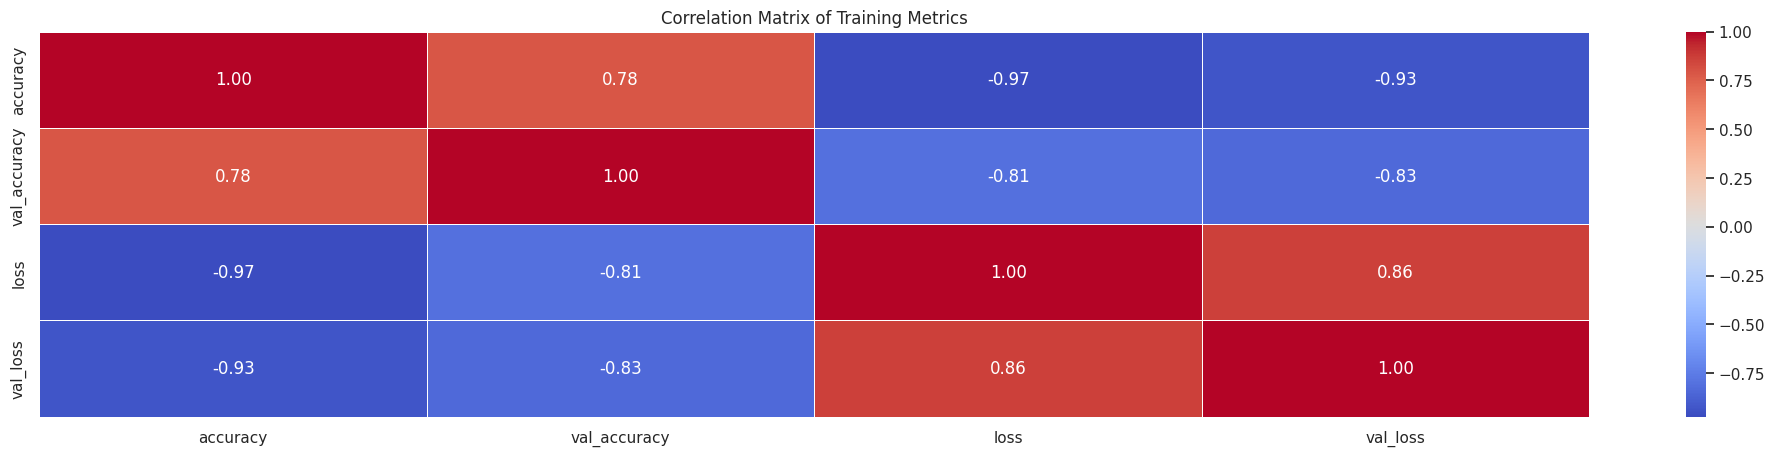

In [24]:
metrics_df = pd.DataFrame({
    'accuracy': history.history['accuracy'],
    'val_accuracy': history.history['val_accuracy'],
    'loss': history.history['loss'],
    'val_loss': history.history['val_loss']
})

correlation = metrics_df.corr()


plt.figure(figsize=(25, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Training Metrics')
plt.show()


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


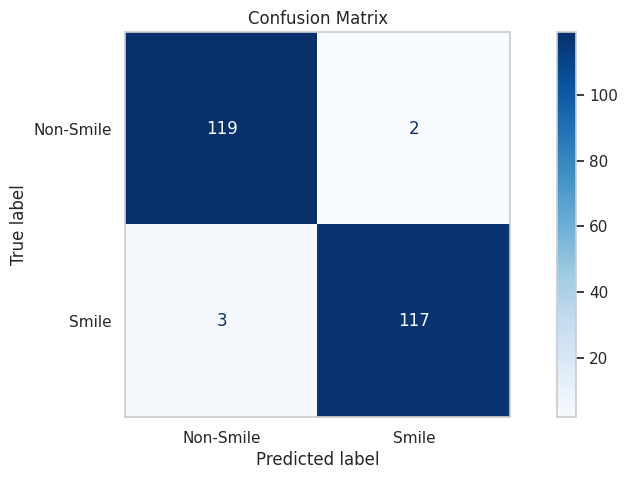

In [29]:
y_pred_probs = model.predict(X_val)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

cm = confusion_matrix(y_val, y_pred)

fig, ax = plt.subplots(figsize=(12, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Smile", "Smile"])
disp.plot(cmap='Blues', values_format='d', ax=ax)

plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

In [20]:
def show_predictions(X, y, model, num=5):
    indices = np.random.choice(len(X), num)
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(indices):
        img = X[idx]
        true_label = y[idx]
        pred = model.predict(np.expand_dims(img, axis=0))[0][0]
        pred_label = 1 if pred > 0.5 else 0
        color = 'green' if pred_label == true_label else 'red'

        plt.subplot(1, num, i+1)
        plt.imshow(img)
        plt.title(f"Pred: {pred_label} | True: {true_label}", color=color)
        plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


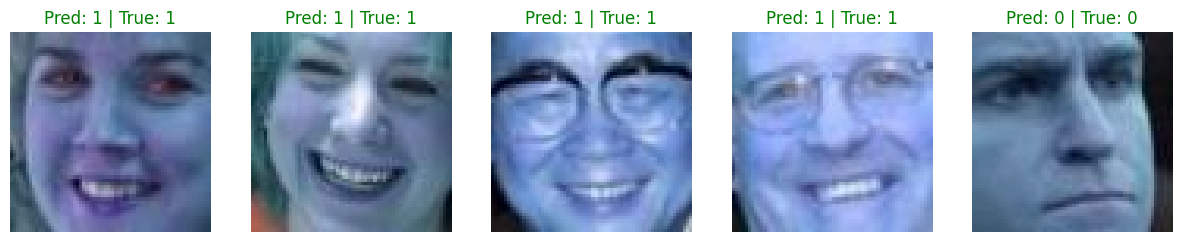

In [21]:
show_predictions(X_val, y_val, model)

In [22]:
# Save the trained model
model.save('/content/drive/MyDrive/SmilingFaceModel/smile_detector_model.h5')